In [3]:
%pylab inline
import numpy as np
from scipy import linalg
import matplotlib.pyplot as pltx 

Populating the interactive namespace from numpy and matplotlib


In [2]:
x = np.array([0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556, 0.666667, 0.777778, 0.888889, 1.00000])
y = np.array([0.349486, 0.830839, 1.007332, 0.971507, 0.133066, 0.166823, -0.848307, -0.445686, -0.563567, 0.261502])

In [10]:
def ridge(x,y,M,l):
    A = np.empty((len(x), M+1))
    for i in range(M+1) :
        A[:,i] = x**i
    return (linalg.inv(A.T.dot(A) + l * eye(M+1)).dot(A.T)).dot(y)

def polynomial(a,v):
    res = np.zeros(len(v))
    for i in range(len(a)):
        res += a[i]*(v**i)
    return res

def testError(x,y,p):
    return sum((polynomial(p,x)-y)**2)/len(y)


## Question 1

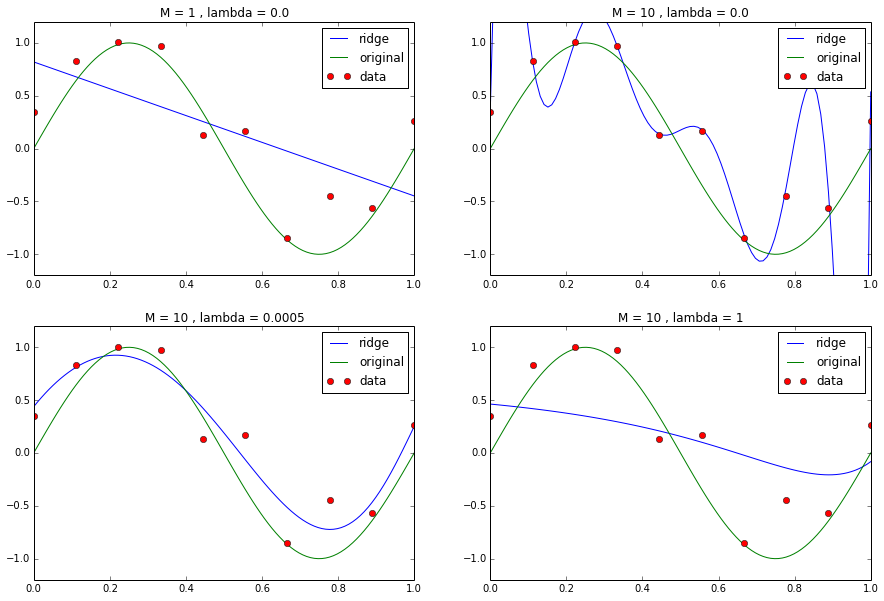

In [14]:
M = [1, 10, 10, 10]
l = [0., 0., 0.0005, 1]
X = np.linspace(0,1,100)
pylab.rcParams['figure.figsize'] = (15, 10)

for i in range(len(M)):
    plt.subplot(2, 2, i+1)
    plt.plot(X, polynomial(ridge(x,y,M[i],l[i]),X), label="ridge")
    plt.plot(X, np.sin(2*pi*X), label="original")
    plt.plot(x,y, 'o', label="data")
    plt.legend()
    xlim(0.0,1.0)
    ylim(-1.2,1.2)
    title("M = " + str(M[i])+ " , lambda = " + str(l[i]))
savefig('Figures/Q3/ridge1.png', bbox_inches='tight')

## Question 2

In [16]:
xTrain = np.array([3.276996183407696606e-01, 1.176948253640660802e+00, 1.822721363882732426e+00, -9.965653937149356878e-01, 6.088001993352136765e-01, 1.300180078277893614e+00, -2.486210968294961798e+00, -2.596315276559524321e+00, 8.657687628042531891e-01, 9.853468725760055058e-01])
yTrain = np.array([1.396891706939307642e+00, 1.899114221864507623e+00, 2.611662342139686288e+00, -2.823659287220217640e-01, 1.859672974749174701e+00, 2.202075377612248364e+00, -1.271864131160622025e+00, 3.461014538750154301e+00, 1.939445995270015821e+00, 2.261806390573123604e+00])
xTest = np.array([-2.308709099548811317e+00, 3.461065321761553903e-01, 7.028541947289426162e-01, -2.733503679260440133e+00, 9.385764884272367325e-01, -1.603626400693882736e+00, 1.281207043506382703e+00, 1.437291590368408478e+00, 1.574555474235866726e+00, -2.275042849016735147e+00])
yTest = np.array([-1.272139358214949834e+00, 1.498584745263135565e+00, 2.032374013010742164e+00, -2.082383557161827436e+00, 2.405459571834318577e+00, -5.272821551109053706e-01, 2.073525464725472389e+00, 2.586674321743608118e+00, 2.601929499170297255e+00, -1.504589096842577689e+00])
xValid = np.array([-1.644444510248792568e+00, -7.848910491116720678e-01, -1.007795247049512177e+00, 1.961377385880846980e+00, 1.321337259087224325e+00, -1.159371741179124449e+00, -2.158831784807564436e+00, 8.964968179097643208e-01, 6.835183488120271100e-01, -2.019186726036471313e+00])
yValid = np.array([-9.539107909685196063e-01, 1.935183715034599072e-01, 6.998099375704774916e-02, 3.146752439881861374e+00, 2.249900740502030594e+00, -5.082602947063521448e-01, -9.264639923950835909e-01, 1.760022511549405921e+00, 2.033770819175588329e+00, -9.849792749100714229e-01])
xMin = min(xTrain.min(), xValid.min(), xTest.min())
xMax = max(xTrain.max(), xValid.max(), xTest.max())
yMin = min(yTrain.min(), yValid.min(), yTest.min())
yMax = max(yTrain.max(), yValid.max(), yTest.max())

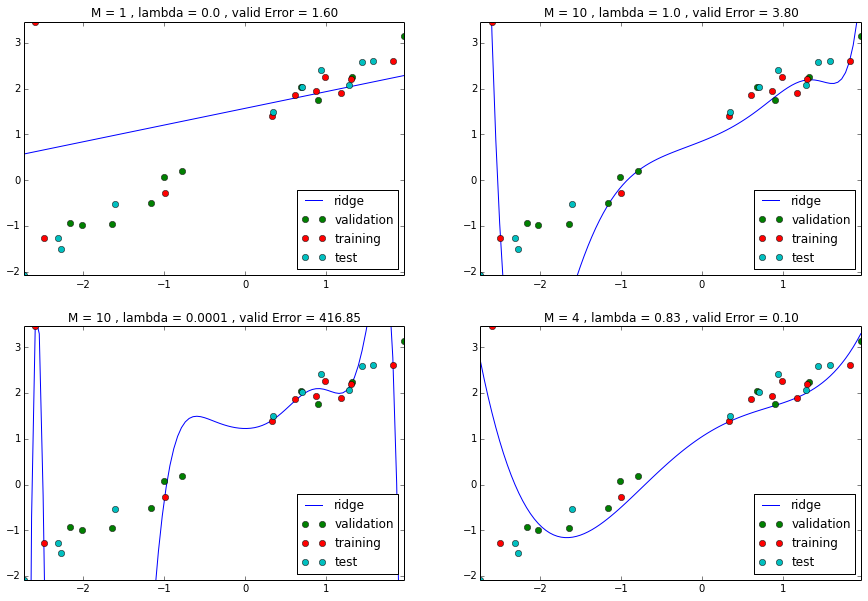

In [21]:
M = [1, 10, 10, 4]
l = [0., 1., 0.0001, 0.83]

X = np.linspace(xMin,xMax,100)
pylab.rcParams['figure.figsize'] = (15, 10)

for i in range(len(M)):
    plt.subplot(2, 2, i+1)
    poly = ridge(xTrain,yTrain,M[i],l[i])
    plt.plot(X, polynomial(poly,X), label="ridge")
    plt.plot(xValid, yValid, 'o', label="validation")
    plt.plot(xTrain,yTrain, 'o', label="training")
    plt.plot(xTest,yTest, 'o', label="test")

    plt.legend(loc='lower right')
    xlim(xMin,xMax)
    ylim(yMin,yMax)
    title("M = " + str(M[i])+ " , lambda = " + str(l[i])+ " , valid Error = " + "%.2f" % testError(xValid,yValid,poly))
savefig('Figures/Q3/ridge2.png', bbox_inches='tight')

Cross Validation to find M and l

In [ ]:
M = [3, 4, 5]
l = [0.8, 0.85, 0.87, 0.9, 0.91, 0.95, 1, 1.1]
errorTrain = np.empty((len(M),len(l)))
errorValid = np.empty((len(M),len(l)))


for i in range(len(M)):
    for j in range(len(l)):
        poly = ridge(xTrain,yTrain,M[i],l[j])
        errorTrain[i,j] = testError(xTrain,yTrain, poly)
        errorValid[i,j] = testError(xValid,yValid, poly)
print errorTrain
print errorValid

In [ ]:
np.unravel_index(errorValid.argmin(),(len(M),len(l)))

In [23]:
testError(xTest,yTest, ridge(xTrain,yTrain,4,0.83))

2.7577215196642491

## Question 3

In [42]:
def ridge2(A,y,l):
    return (linalg.inv(A.T.dot(A) + l * eye(280)).dot(A.T)).dot(y)

def linear(a, X):
    return X.dot(a)

def testError(X,y,a):
    return sum((linear(a,X)-y)**2)/len(y)

In [41]:
with open('data/x_train.csv', 'r') as f:
     data = f.read()
xTrain = np.array([np.array(l.split(","), dtype=float) for l in data.split("\n")[:-1]])

with open('data/y_train.csv', 'r') as f:
     data = f.read()
yTrain = np.array(data.split("\n")[:-1],dtype=float)

with open('data/x_test.csv', 'r') as f:
     data = f.read()
xTest = np.array([np.array(l.split(","), dtype=float) for l in data.split("\n")[:-1]])

with open('data/y_test.csv', 'r') as f:
     data = f.read()
yTest = np.array(data.split("\n")[:-1],dtype=float)

with open('data/x_val.csv', 'r') as f:
     data = f.read()
xValid = np.array([np.array(l.split(","), dtype=float) for l in data.split("\n")[:-1]])

with open('data/y_val.csv', 'r') as f:
     data = f.read()
yValid = np.array(data.split("\n")[:-1],dtype=float)



In [50]:
l = np.linspace(-3,6,200)
trainError = np.empty(len(l))
validError = np.empty(len(l))

for i,lbd in enumerate(l):
    coef = ridge2(xTrain,yTrain,10**lbd)

    trainError[i] = testError(xTrain, yTrain, coef)
    validError[i] = testError(xValid, yValid, coef)


[ 880.59453863  880.59471399  880.59488285  880.59504454  880.5951986
  880.59534472  880.59548271  880.59561252  880.5957342   880.59584784
  880.59595367  880.59605195  880.59614298  880.59622711  880.5963047
  880.59637615  880.59644184  880.59650218  880.59655756  880.59660838
  880.59665502  880.59669787  880.59673731  880.59677369  880.59680741
  880.59683881  880.59686829  880.59689621  880.596923    880.59694908
  880.59697491  880.597001    880.59702795  880.59705638  880.59708707
  880.59712087  880.59715881  880.5972021   880.59725214  880.59731061
  880.59737952  880.59746121  880.59755848  880.59767464  880.59781359
  880.59797994  880.59817909  880.59841735  880.59870208  880.59904185
  880.59944652  880.59992745  880.60049763  880.60117188  880.60196694
  880.60290169  880.60399727  880.60527726  880.60676778  880.60849763
  880.61049845  880.61280477  880.61545416  880.61848735  880.62194827
  880.62588423  880.63034599  880.63538791  880.64106805  880.64744834
  880.65

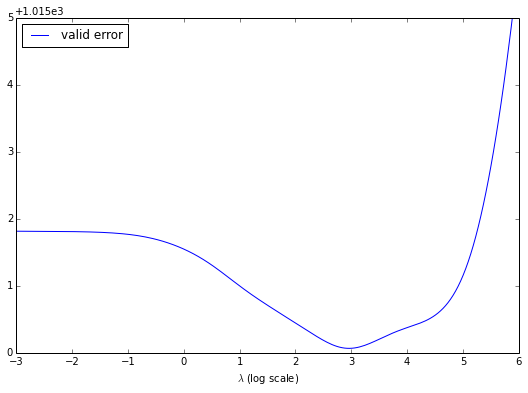

In [56]:
# plt.plot(l, trainError, label="train error")
pylab.rcParams['figure.figsize'] = (9, 6)

plt.plot(l, validError, label="valid error")
plt.legend(loc='upper left')
ylim(1015,1020)
xlim(-3,6)
xlabel("$\lambda$ (log scale)")
savefig('Figures/Q3/grid.png', bbox_inches='tight')

In [ ]:
validError

Best : $\lambda = 10^{2.95}$

In [6]:
coef = ridge2(xTrain,yTrain,10**2.95)

trainError = testError(xTrain, yTrain, coef)
validError = testError(xValid, yValid, coef)
testError2  = testError(xTest, yTest, coef)

In [7]:
trainError, validError, testError2

(884.97651336545073, 1015.0664170028429, 896.36732740372474)

## with  scaling

In [43]:
temp = np.hstack((yTrain,yValid))
mean = np.mean(temp)
std_y = np.std(temp)
yTrain2 = yTrain
yValid2 = yValid
yTest2  = yTest



In [48]:
maxi = np.max(np.vstack((xTrain, xValid)), axis=0)
mini = np.min(np.vstack((xTrain, xValid)), axis=0)
d = maxi - mini
d[d==0] = 1

xTrain2 = (xTrain - mini)/d
xValid2 = (xValid - mini)/d
xTest2  = (xTest  - mini)/d


In [49]:
l = np.linspace(-3,6,200)
trainError = np.empty(len(l))
validError = np.empty(len(l))

for i,lbd in enumerate(l):
    coef = ridge2(xTrain2,yTrain2,10**lbd)

    trainError[i] = testError(xTrain2, yTrain2, coef)
    validError[i] = testError(xValid2, yValid2, coef)


In [50]:
l[np.argmin(validError)], np.argmin(validError), min(validError)

(-0.60301507537688437, 53, 1015.2300741538896)

In [ ]:
# plt.plot(l, trainError, label="train error")
plt.plot(l, validError, label="valid error")
plt.legend(loc='lower right')

In [51]:
coef = ridge2(xTrain2,yTrain2,10**-0.60301507)

trainError = testError(xTrain2, yTrain2, coef)
validError = testError(xValid2, yValid2, coef)
tstError  = testError(xTest2, yTest2, coef)
trainError, validError, tstError


(881.63122436517301, 1015.2300741538282, 894.51817776462428)

In [ ]:
trainError*std_y**2, validError*std_y**2, tstError*std_y**2


In [ ]:
(884.93260646477972, 1015.0665960185978, 896.38238542909073)

# Question 4

In [52]:
x = np.array([0.000000, 0.111111, 0.222222, 0.333333, 0.444444, 0.555556, 0.666667, 0.777778, 0.888889, 1.00000])
y = np.array([0.349486, 0.830839, 1.007332, 0.971507, 0.133066, 0.166823, -0.848307, -0.445686, -0.563567, 0.261502])

In [105]:

from scipy.optimize import basinhopping as opt

def lad(x,y,M,l):
    A = np.empty((len(x), M+1))
    for i in range(M+1) :
        A[:,i] = x**i
    def opti(a):
        return sum(np.abs(A.dot(a)-y)) + l * sum(np.square(a))
    o = opt(opti,np.zeros(M+1))
    print o["message"]
    return o["x"]

def polynomial(a,v):
    res = np.zeros(len(v))
    for i in range(len(a)):
        res += a[i]*(v**i)
    return res

def testError(x,y,p):
    return sum((polynomial(p,x)-y)**2)/len(y)


['requested number of basinhopping iterations completed successfully']
['requested number of basinhopping iterations completed successfully']
['requested number of basinhopping iterations completed successfully']
['requested number of basinhopping iterations completed successfully']


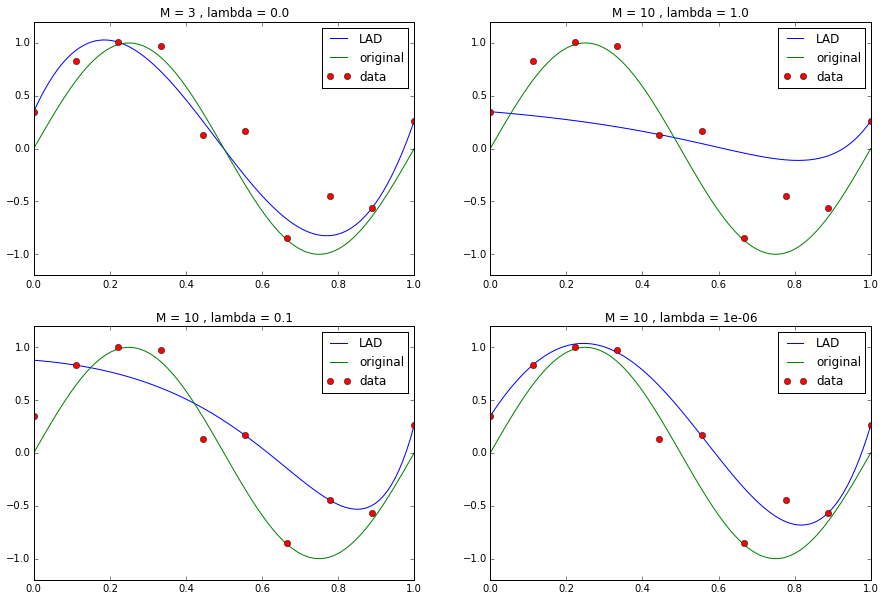

In [108]:
M = [3,10, 10, 10]
l = [0.0, 1., 0.1, 0.000001]
X = np.linspace(0,1,100)
pylab.rcParams['figure.figsize'] = (15, 10)

for i in range(len(M)):
    plt.subplot(2, 2, i+1)
    plt.plot(X, polynomial(lad(x,y,M[i],l[i]),X), label="LAD")
    plt.plot(X, np.sin(2*pi*X), label="original")
    plt.plot(x,y, 'o', label="data")
    plt.legend()
    xlim(0.0,1.0)
    ylim(-1.2,1.2)
    title("M = " + str(M[i])+ " , lambda = " + str(l[i]))
savefig('Figures/Q4/lad1.png', bbox_inches='tight')

In [109]:
xTrain = np.array([3.276996183407696606e-01, 1.176948253640660802e+00, 1.822721363882732426e+00, -9.965653937149356878e-01, 6.088001993352136765e-01, 1.300180078277893614e+00, -2.486210968294961798e+00, -2.596315276559524321e+00, 8.657687628042531891e-01, 9.853468725760055058e-01])
yTrain = np.array([1.396891706939307642e+00, 1.899114221864507623e+00, 2.611662342139686288e+00, -2.823659287220217640e-01, 1.859672974749174701e+00, 2.202075377612248364e+00, -1.271864131160622025e+00, 3.461014538750154301e+00, 1.939445995270015821e+00, 2.261806390573123604e+00])
xTest = np.array([-2.308709099548811317e+00, 3.461065321761553903e-01, 7.028541947289426162e-01, -2.733503679260440133e+00, 9.385764884272367325e-01, -1.603626400693882736e+00, 1.281207043506382703e+00, 1.437291590368408478e+00, 1.574555474235866726e+00, -2.275042849016735147e+00])
yTest = np.array([-1.272139358214949834e+00, 1.498584745263135565e+00, 2.032374013010742164e+00, -2.082383557161827436e+00, 2.405459571834318577e+00, -5.272821551109053706e-01, 2.073525464725472389e+00, 2.586674321743608118e+00, 2.601929499170297255e+00, -1.504589096842577689e+00])
xValid = np.array([-1.644444510248792568e+00, -7.848910491116720678e-01, -1.007795247049512177e+00, 1.961377385880846980e+00, 1.321337259087224325e+00, -1.159371741179124449e+00, -2.158831784807564436e+00, 8.964968179097643208e-01, 6.835183488120271100e-01, -2.019186726036471313e+00])
yValid = np.array([-9.539107909685196063e-01, 1.935183715034599072e-01, 6.998099375704774916e-02, 3.146752439881861374e+00, 2.249900740502030594e+00, -5.082602947063521448e-01, -9.264639923950835909e-01, 1.760022511549405921e+00, 2.033770819175588329e+00, -9.849792749100714229e-01])
xMin = min(xTrain.min(), xValid.min(), xTest.min())
xMax = max(xTrain.max(), xValid.max(), xTest.max())
yMin = min(yTrain.min(), yValid.min(), yTest.min())
yMax = max(yTrain.max(), yValid.max(), yTest.max())

['requested number of basinhopping iterations completed successfully']
['requested number of basinhopping iterations completed successfully']
['requested number of basinhopping iterations completed successfully']
['requested number of basinhopping iterations completed successfully']


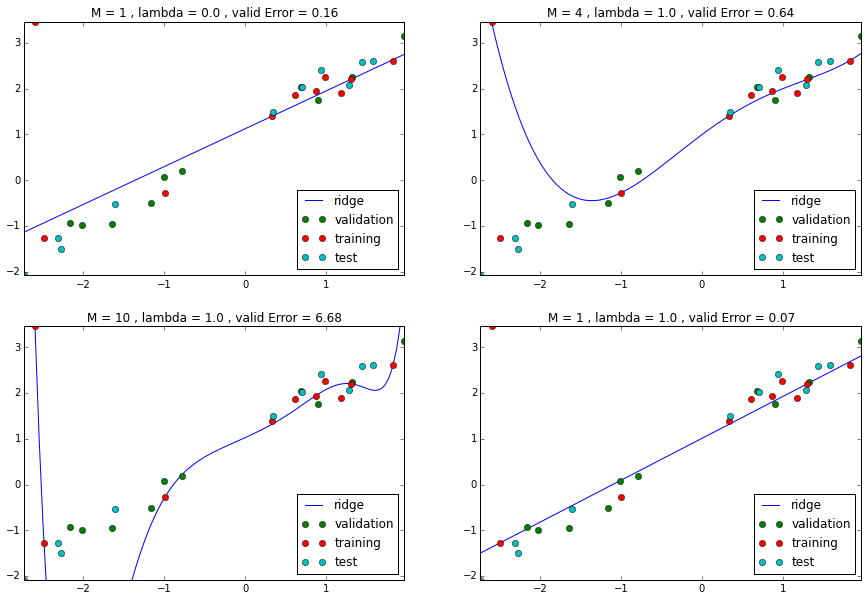

In [117]:
M = [1, 4, 10, 1]
l = [0., 1., 1., 1.]

X = np.linspace(xMin,xMax,100)
pylab.rcParams['figure.figsize'] = (15, 10)

for i in range(len(M)):
    plt.subplot(2, 2, i+1)
    poly = lad(xTrain,yTrain,M[i],l[i])
    plt.plot(X, polynomial(poly,X), label="ridge")
    plt.plot(xValid, yValid, 'o', label="validation")
    plt.plot(xTrain,yTrain, 'o', label="training")
    plt.plot(xTest,yTest, 'o', label="test")

    plt.legend(loc='lower right')
    xlim(xMin,xMax)
    ylim(yMin,yMax)
    title("M = " + str(M[i])+ " , lambda = " + str(l[i])+ " , valid Error = " + "%.2f" % testError(xValid,yValid,poly))
savefig('Figures/Q4/lad2.png', bbox_inches='tight')

In [115]:
M = [1]
l = [0.1,0.5,0.7,0.9,1.,1.1,1.2,1.5,2.]
errorTrain = np.empty((len(M),len(l)))
errorValid = np.empty((len(M),len(l)))


for i in range(len(M)):
    for j in range(len(l)):
        poly = lad(xTrain,yTrain,M[i],l[j])
        errorTrain[i,j] = testError(xTrain,yTrain, poly)
        errorValid[i,j] = testError(xValid,yValid, poly)
print errorTrain
print errorValid

['requested number of basinhopping iterations completed successfully']
['requested number of basinhopping iterations completed successfully']
['requested number of basinhopping iterations completed successfully']
['requested number of basinhopping iterations completed successfully']
['requested number of basinhopping iterations completed successfully']
['requested number of basinhopping iterations completed successfully']
['requested number of basinhopping iterations completed successfully']
['requested number of basinhopping iterations completed successfully']
['requested number of basinhopping iterations completed successfully']
[[ 2.07767035  2.08867199  2.30528546  2.37794512  2.3781521   2.38281605
   2.38294398  2.38295025  2.38294604]]
[[ 0.16480699  0.15956296  0.0863206   0.07224517  0.07221504  0.07844947
   0.07842593  0.07843299  0.07843358]]


In [116]:
np.unravel_index(errorValid.argmin(),(len(M),len(l)))

(0, 4)

In [119]:
testError(xTest,yTest, lad(xTrain,yTrain,1,1.))

['requested number of basinhopping iterations completed successfully']


0.11153633518235924

In [120]:
def lad2(A,y,l):
    def opti(a):
        return sum(np.abs(A.dot(a)-y)) + l * sum(np.square(a))
    o = opt(opti,np.zeros(M+1))
    print o["message"]
    return o["x"]
def linear(a, X):
    return X.dot(a)

def testError(X,y,a):
    return sum((linear(a,X)-y)**2)/len(y)

In [121]:
with open('data/x_train.csv', 'r') as f:
     data = f.read()
xTrain = np.array([np.array(l.split(","), dtype=float) for l in data.split("\n")[:-1]])

with open('data/y_train.csv', 'r') as f:
     data = f.read()
yTrain = np.array(data.split("\n")[:-1],dtype=float)

with open('data/x_test.csv', 'r') as f:
     data = f.read()
xTest = np.array([np.array(l.split(","), dtype=float) for l in data.split("\n")[:-1]])

with open('data/y_test.csv', 'r') as f:
     data = f.read()
yTest = np.array(data.split("\n")[:-1],dtype=float)

with open('data/x_val.csv', 'r') as f:
     data = f.read()
xValid = np.array([np.array(l.split(","), dtype=float) for l in data.split("\n")[:-1]])

with open('data/y_val.csv', 'r') as f:
     data = f.read()
yValid = np.array(data.split("\n")[:-1],dtype=float)


In [122]:
l = np.linspace(-3,6,200)
trainError = np.empty(len(l))
validError = np.empty(len(l))

for i,lbd in enumerate(l):
    coef = lad2(xTrain,yTrain,10**lbd)

    trainError[i] = testError(xTrain, yTrain, coef)
    validError[i] = testError(xValid, yValid, coef)

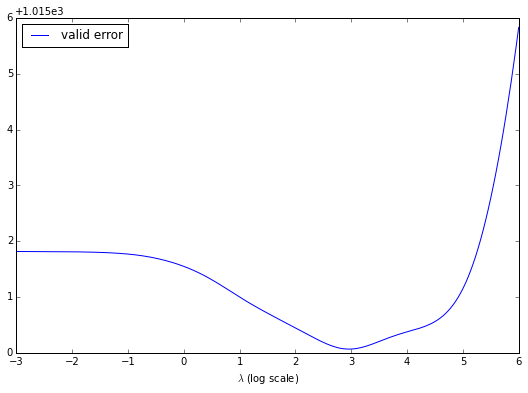

In [124]:
# plt.plot(l, trainError, label="train error")
pylab.rcParams['figure.figsize'] = (9, 6)

plt.plot(l, validError, label="valid error")
plt.legend(loc='upper left')
# ylim(1015,1020)
# xlim(-3,6)
xlabel("$\lambda$ (log scale)")
savefig('Figures/Q4/grid.png', bbox_inches='tight')

In [125]:
l[np.argmin(validError)], np.argmin(validError), min(validError)

(2.9698492462311563, 132, 1015.0664335156962)

In [126]:
coef = lad2(xTrain,yTrain,10**-2.9698492462311563)

trainError = testError(xTrain, yTrain, coef)
validError = testError(xValid, yValid, coef)
tstError  = testError(xTest, yTest, coef)
trainError, validError, tstError


(880.59465621823108, 1016.8158461586345, 899.94776758041701)